# Checks the size of each audio file and it's distribution 

In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

import numpy as np
import pandas as pd
from src.data.read_dataset import read_all_wavs, read_all_csvs

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = read_all_wavs("../data/raw/dadosBruno/")
data.shape

(53830, 3)

In [3]:
# Get the size (#sampling) of all the audios
sizes = np.vectorize(len)(data[:, 1])
sizes = sizes / 44100

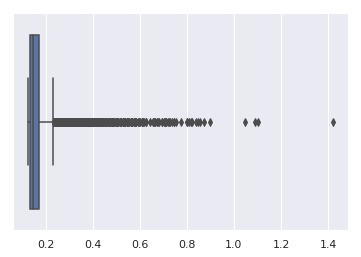

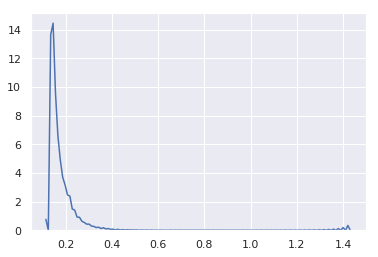

In [4]:
sns.boxplot(sizes)
plt.show()
sns.distplot(sizes, hist=False)

In [5]:
temp = (sizes <= 0.5).sum()
print(f"We have {temp/len(sizes)} data with <= 0.5s")

We have 0.9980679918261193 data with <= 0.5s


Join with our original data to plot by some extra columns

In [6]:
# Read in all our data to plot species
df = read_all_csvs("../data/raw/")

In [7]:
# Join sizes with original data
wav_df = pd.DataFrame(data[:, 2], columns=["name"])

offset = len("../data/raw/dadosBruno/t04/t04_")
wav_df["file"] = wav_df["name"].str.slice(offset).apply(lambda x: x[::-1])
wav_df["file"] = wav_df["file"].str.replace("_", "/", n=2).apply(lambda x: x[::-1])
wav_df["size"] = sizes

In [8]:
# Make sure we have no unmatched names
# We expect 0
(~df["file"].isin(wav_df["file"])).sum()

0

In [9]:
full_df = pd.merge(df, wav_df, left_on="file", right_on="file", validate="1:1")

In [10]:
def plot_sizes(full_df, cat_col):
    # plot distribution
    plt.figure(figsize=(10, 6))
    plt.subplot(1,2,1)
    for group_name, group in full_df.groupby(cat_col):
        sns.distplot(group["size"], hist=False, label=group_name)

    # plot boxplot
    plt.subplot(1,2,2)
    sns.boxplot(data=full_df, y="size", x=cat_col);
    plt.show()

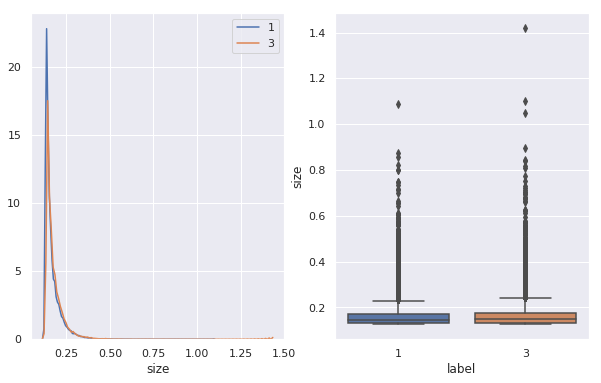

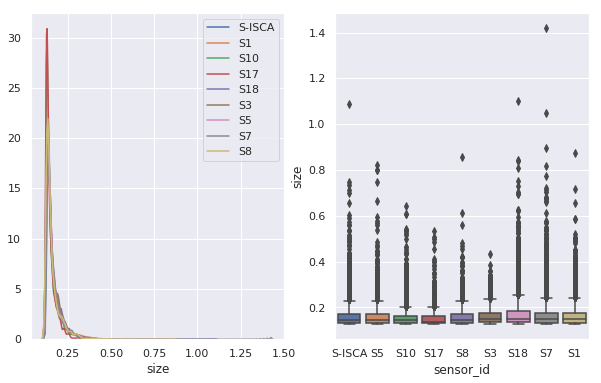

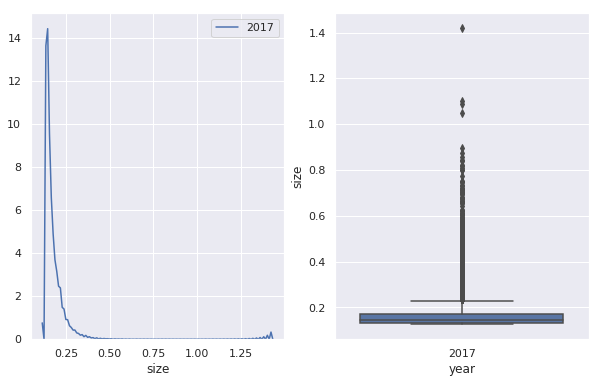

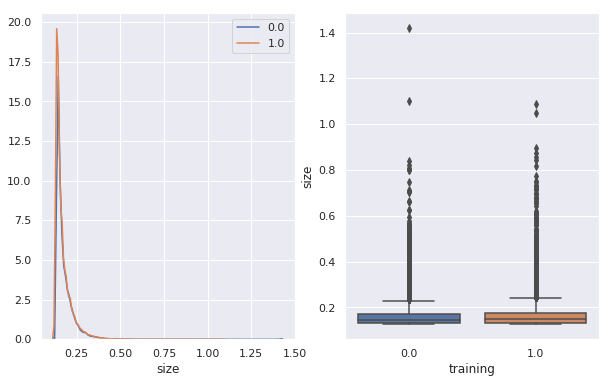

In [11]:
for col in ['label', 'sensor_id', 'year', 'training']:
    plot_sizes(full_df, col)

All distributions of sizes are more or less equal